In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## TRAIN DATASET

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.shape

(614, 13)

In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## TEST DATASET

In [5]:
test1 = pd.read_csv('test.csv')
test1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
test=test1.copy()

In [7]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
test.shape

(367, 12)

In [9]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


## THIS IS A BINARY CLASSIFICATION PROBLEM

In [11]:
g = {'Y' : 1, 'N' : 0}

In [12]:
train['Loan_Status'] = train['Loan_Status'].map(g)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## HANDLING MISSING VALUES

## TRAIN DATA

In [13]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


In [15]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
col = ['LoanAmount', 'Loan_Amount_Term']

In [17]:
def impute_nan(train, feat):
    m=train[feat].median()
    train[feat]=train[feat].fillna(m)

for i in col:
    impute_nan(train, i)

In [18]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [20]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [22]:
train['Credit_History'] = train['Credit_History'].fillna(1.0)
train['Dependents'] = train['Dependents'].fillna(0)

In [23]:
col = ['Self_Employed', 'Married', 'Gender']

In [24]:
def impute_nan(train, feat):
    m=train[feat].mode()[0]
    train[feat]=train[feat].fillna(m)
    
for i in col:
    impute_nan(train, i)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [25]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## TEST DATA

In [26]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [27]:
test.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [28]:
test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [29]:
col = ['LoanAmount', 'Loan_Amount_Term']

In [30]:
def impute_nan(test, feat):
    m=test[feat].median()
    test[feat]=test[feat].fillna(m)

for i in col:
    impute_nan(test, i)

In [31]:
test['Credit_History'] = test['Credit_History'].fillna(1.0)
test['Dependents'] = test['Dependents'].fillna(0)

In [32]:
col = ['Self_Employed', 'Gender']

In [33]:
def impute_nan(test, feat):
    m=test[feat].mode()[0]
    test[feat]=test[feat].fillna(m)
    
for i in col:
    impute_nan(test, i)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [34]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## FEATURE ENGINEERING

In [35]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [36]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [37]:
train.shape, test.shape

((614, 13), (367, 12))

In [38]:
final = pd.concat([train, test], axis=0)
final.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,128.0,360.0,LP001002,1.0,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,0.0,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,1.0,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,1.0,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,1.0,No,Urban,No


In [39]:
feat_cat=[feature for feature in final.columns if final[feature].dtype =='O']
feat_cat

['Dependents',
 'Education',
 'Gender',
 'Loan_ID',
 'Married',
 'Property_Area',
 'Self_Employed']

In [40]:
for feature in feat_cat:
    print('The feature is {} and number of categories are {}'.format(feature,len(final[feature].unique())))

The feature is Dependents and number of categories are 5
The feature is Education and number of categories are 2
The feature is Gender and number of categories are 2
The feature is Loan_ID and number of categories are 981
The feature is Married and number of categories are 2
The feature is Property_Area and number of categories are 3
The feature is Self_Employed and number of categories are 2


In [41]:
final = final.drop(['Loan_ID'], axis = 1)
final.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,128.0,360.0,1.0,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,0.0,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,1.0,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,1.0,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,1.0,No,Urban,No


In [42]:
dependent=pd.get_dummies(final['Dependents'], drop_first=True)
education=pd.get_dummies(final['Education'], drop_first=True)
gender=pd.get_dummies(final['Gender'], drop_first=True)
married=pd.get_dummies(final['Married'], drop_first=True)
propertyarea=pd.get_dummies(final['Property_Area'], drop_first=True)
selfemployed=pd.get_dummies(final['Self_Employed'], drop_first=True)

In [43]:
final.drop(['Dependents', 'Education', 'Gender', 'Married', 'Property_Area', 'Self_Employed'], axis=1, inplace=True)
final.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Loan_Status
0,5849,0.0,1.0,128.0,360.0,1.0
1,4583,1508.0,1.0,128.0,360.0,0.0
2,3000,0.0,1.0,66.0,360.0,1.0
3,2583,2358.0,1.0,120.0,360.0,1.0
4,6000,0.0,1.0,141.0,360.0,1.0


In [44]:
final=pd.concat([final, dependent, education, gender, married, propertyarea, selfemployed], axis=1)
final.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Loan_Status,0,1,2,3+,Not Graduate,Male,Yes,Semiurban,Urban,Yes
0,5849,0.0,1.0,128.0,360.0,1.0,1,0,0,0,0,1,0,0,1,0
1,4583,1508.0,1.0,128.0,360.0,0.0,0,1,0,0,0,1,1,0,0,0
2,3000,0.0,1.0,66.0,360.0,1.0,1,0,0,0,0,1,1,0,1,1
3,2583,2358.0,1.0,120.0,360.0,1.0,1,0,0,0,1,1,1,0,1,0
4,6000,0.0,1.0,141.0,360.0,1.0,1,0,0,0,0,1,0,0,1,0


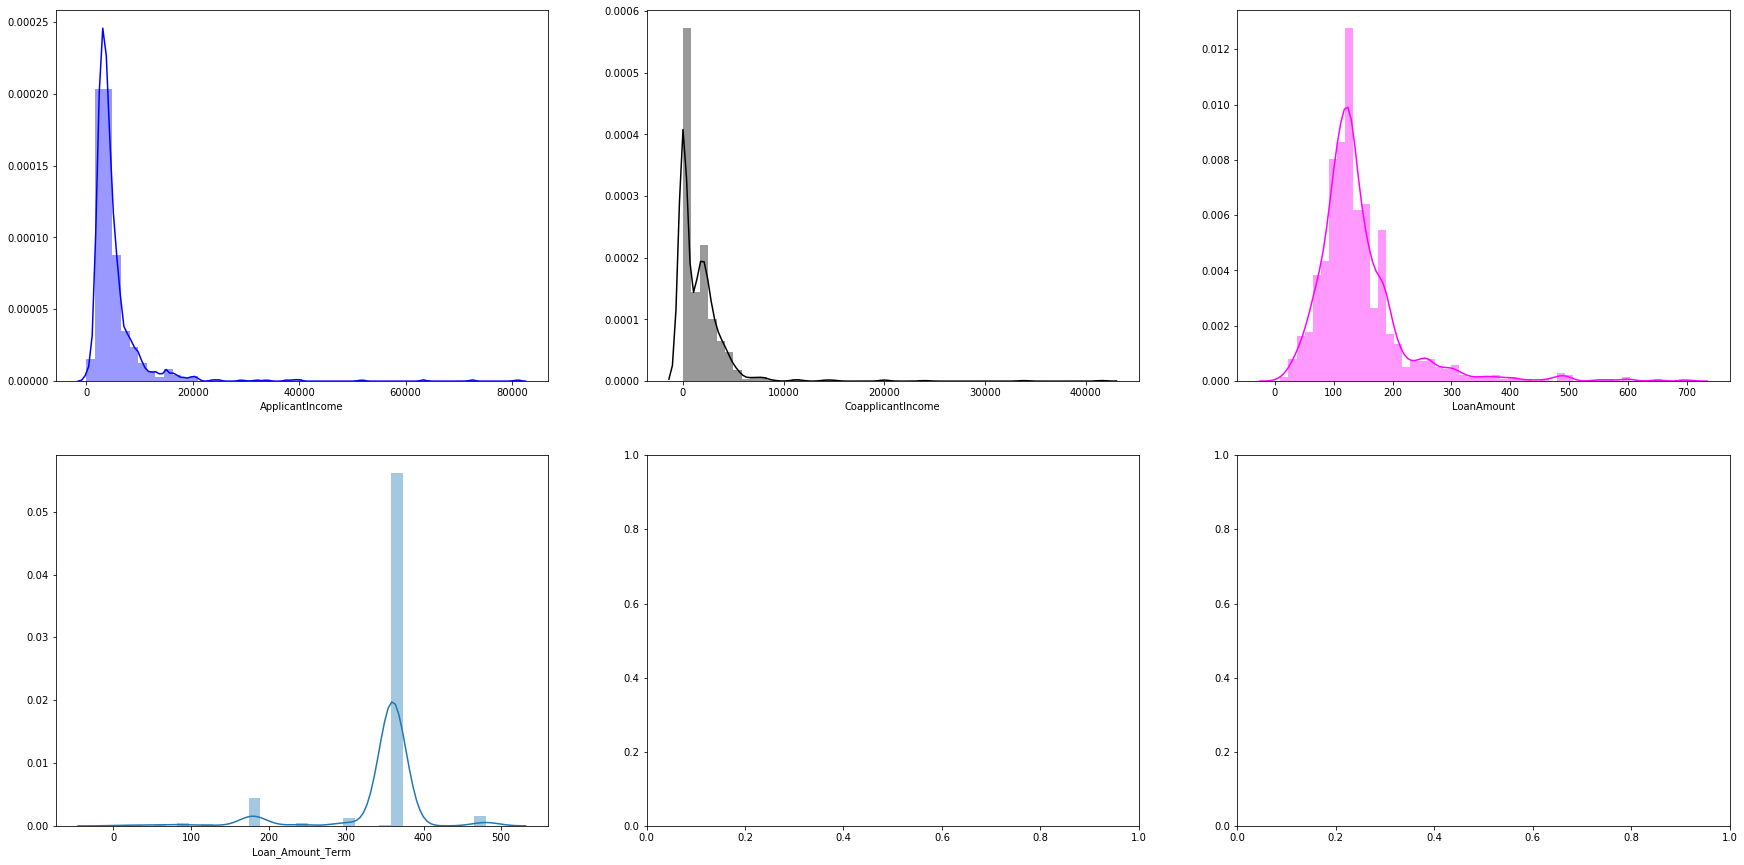

In [45]:
fig, ax = plt.subplots(2,3,figsize = (30,15))
sns.distplot(final["ApplicantIncome"], kde =True, ax=ax[0,0], color = "blue")
sns.distplot(final["CoapplicantIncome"], kde =True, ax=ax[0,1], color = "black")
sns.distplot(final["LoanAmount"], kde =True, ax=ax[0,2], color = "magenta")
sns.distplot(final["Loan_Amount_Term"], kde =True, ax=ax[1,0])

In [46]:
import scipy.stats as stat
import pylab

In [47]:
def plot_data(final,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    final[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(final[feature],dist='norm',plot=pylab)
    plt.show()

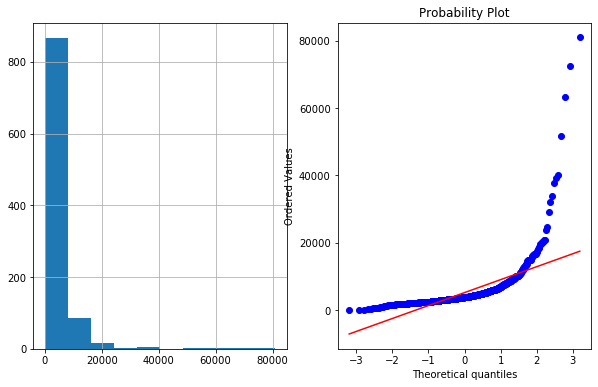

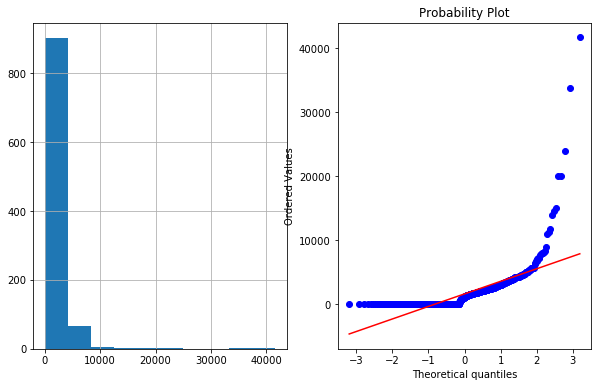

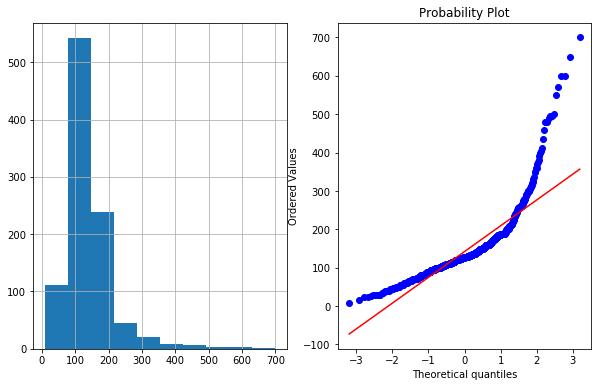

In [48]:
plot_data(final, "ApplicantIncome")
plot_data(final, "CoapplicantIncome")
plot_data(final, "LoanAmount")

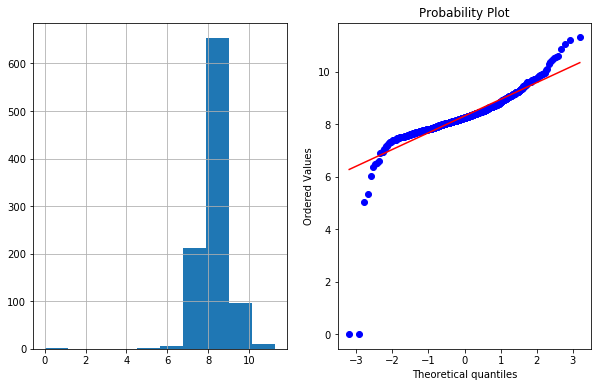

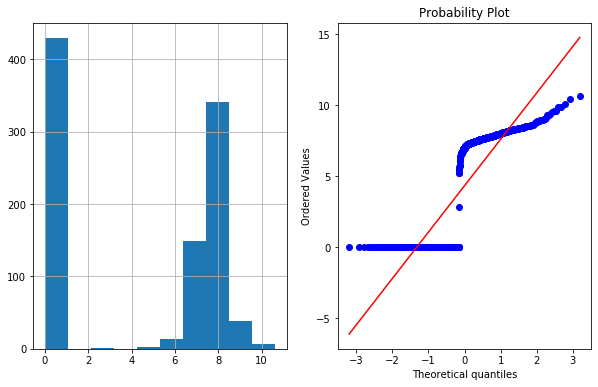

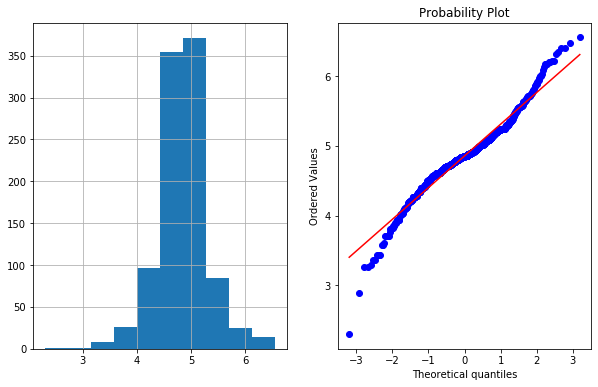

In [49]:
final['ApplicantIncome']=np.log(final['ApplicantIncome']+1)
plot_data(final, "ApplicantIncome")
final['CoapplicantIncome']=np.log(final['CoapplicantIncome']+1)
plot_data(final, "CoapplicantIncome")
final['LoanAmount']=np.log(final['LoanAmount']+1)
plot_data(final, "LoanAmount")

In [50]:
final.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Loan_Status,0,1,2,3+,Not Graduate,Male,Yes,Semiurban,Urban,Yes
0,8.674197,0.000000,1.0,4.859812,360.0,1.0,1,0,0,0,0,1,0,0,1,0
1,8.430327,7.319202,1.0,4.859812,360.0,0.0,0,1,0,0,0,1,1,0,0,0
2,8.006701,0.000000,1.0,4.204693,360.0,1.0,1,0,0,0,0,1,1,0,1,1
3,7.857094,7.765993,1.0,4.795791,360.0,1.0,1,0,0,0,1,1,1,0,1,0
4,8.699681,0.000000,1.0,4.955827,360.0,1.0,1,0,0,0,0,1,0,0,1,0


In [51]:
df=final.loc[:,final.columns!='Loan_Status']
df['Loan_Status']=final['Loan_Status']
df.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,0,1,2,3+,Not Graduate,Male,Yes,Semiurban,Urban,Yes,Loan_Status
0,8.674197,0.000000,1.0,4.859812,360.0,1,0,0,0,0,1,0,0,1,0,1.0
1,8.430327,7.319202,1.0,4.859812,360.0,0,1,0,0,0,1,1,0,0,0,0.0
2,8.006701,0.000000,1.0,4.204693,360.0,1,0,0,0,0,1,1,0,1,1,1.0
3,7.857094,7.765993,1.0,4.795791,360.0,1,0,0,0,1,1,1,0,1,0,1.0
4,8.699681,0.000000,1.0,4.955827,360.0,1,0,0,0,0,1,0,0,1,0,1.0


In [52]:
final=df
final.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,0,1,2,3+,Not Graduate,Male,Yes,Semiurban,Urban,Yes,Loan_Status
0,8.674197,0.000000,1.0,4.859812,360.0,1,0,0,0,0,1,0,0,1,0,1.0
1,8.430327,7.319202,1.0,4.859812,360.0,0,1,0,0,0,1,1,0,0,0,0.0
2,8.006701,0.000000,1.0,4.204693,360.0,1,0,0,0,0,1,1,0,1,1,1.0
3,7.857094,7.765993,1.0,4.795791,360.0,1,0,0,0,1,1,1,0,1,0,1.0
4,8.699681,0.000000,1.0,4.955827,360.0,1,0,0,0,0,1,0,0,1,0,1.0


In [53]:
scale_data=[feature for feature in final.columns if feature not in ['Loan_Status']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
final[scale_data]=scaler.fit_transform(final[scale_data])
final.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,0,1,2,3+,Not Graduate,Male,Yes,Semiurban,Urban,Yes,Loan_Status
0,0.767477,0.000000,1.0,0.601711,0.746835,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.745900,0.688057,1.0,0.601711,0.746835,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.708419,0.000000,1.0,0.447563,0.746835,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.695182,0.730059,1.0,0.586647,0.746835,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.769732,0.000000,1.0,0.624304,0.746835,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [54]:
train=final.iloc[:614,:]
test=final.iloc[614:,:]

In [55]:
train.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,0,1,2,3+,Not Graduate,Male,Yes,Semiurban,Urban,Yes,Loan_Status
0,0.767477,0.000000,1.0,0.601711,0.746835,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.745900,0.688057,1.0,0.601711,0.746835,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.708419,0.000000,1.0,0.447563,0.746835,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.695182,0.730059,1.0,0.586647,0.746835,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.769732,0.000000,1.0,0.624304,0.746835,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [56]:
test.drop(['Loan_Status'],axis=1,inplace=True)
test.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,0,1,2,3+,Not Graduate,Male,Yes,Semiurban,Urban,Yes
0,0.765505,0.000000,1.0,0.566350,0.746835,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.710631,0.687558,1.0,0.598035,0.746835,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.753604,0.704687,1.0,0.715248,0.746835,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.686444,0.737267,1.0,0.544136,0.746835,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.716203,0.000000,1.0,0.486329,0.746835,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [57]:
x=train.drop(['Loan_Status'], axis = 1)
y=train['Loan_Status']
x.shape, y.shape

((614, 15), (614,))

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

In [59]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=2, random_state=1)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.46      0.62        28
         1.0       0.86      0.99      0.92        95

    accuracy                           0.87       123
   macro avg       0.90      0.73      0.77       123
weighted avg       0.88      0.87      0.85       123

[[13 15]
 [ 1 94]]
accuracy is 0.8699186991869918


In [61]:
rfc_proba = clf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.7988721804511278

In [62]:
Loan_Status = clf.predict(test)
Loan_Status

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1.

In [63]:
test1['Loan_Status'] = Loan_Status

In [64]:
test1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1.0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1.0


In [65]:
g = { 1.0 : 'Y', 0.0 : 'N' }

In [66]:
test1['Loan_Status'] = test1['Loan_Status'].map(g)
test1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [67]:
sample = pd.concat([test1['Loan_ID'], test1['Loan_Status']], axis=1)

In [68]:
sample.to_csv('sample_submission.csv',index=False)